<a href="https://colab.research.google.com/github/Varun221/LeNet/blob/master/LeNet_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LeNet-5**
This is an implementation of LeNet 5 described in the Research paper - 'GRADIENT BASED LEARNING APPLIED TO DOCUMENT RECOGNITION' By Yann LeCunn et al. \

The architecture of the network is described in the image below.

![alt text](https://drive.google.com/uc?export=view&id=16CQ1IskrfIqqN-277w3G5X_l1B8mN-1S)

It consists of 5 Convolutional Layers, A Fully Connected Layer and finally an output layer for 10 classes. In The image Cx represents a convolutional layer, Sx represents a Subsampling layer and Fx represents a Fully Connected layer where x is the layer index. Further explanation will be given as we will implement the network.


IMPORTING THE LIBRARIES \
We will be using Tensorflow 2.0 and the integrated Keras API to implement our network. We will use MNIST dataset to train and test our network. Tensorflow provides many datasets including MNIST which can be loaded using tensorflow_dataset module

In [57]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

The MNIST Dataset is already split into Train and Test sets.
The size of the images used in the Paper is (32,32,1) but the size is immaterial for a Neural Network as long as all the images are of same size. Although Bigger images allow more features to be extracted, for all testing and practical purposes the MNIST dataset of (28,28,1) images will suffice.

In [58]:
 # Loading the mnist dataset
 train, test = tfds.as_numpy(tfds.load(
    'mnist',
    split=['train','test'], 
    batch_size=-1, 
    as_supervised=True,
))
trainX, trainY = train[0], train[1]
testX, testY = test[0], test[1]
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


Next We will write a function to show some of the training examples from the training set. 

This is 1


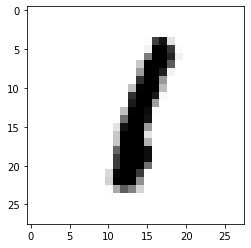

In [59]:
# To check out training images
def show_num(index):
  img_arr = trainX[index, :, :, :]
  to_show = np.squeeze(img_arr) # As plt.imshow works with only 2D arrays we convert (28,28,1) => (28,28)
  print(f"This is {trainY[index]}")
  plt.imshow(to_show, cmap='Greys')
  plt.show()
show_num(5)
# feel free to change the index 

Now we will start building the model. \
First we will import all the Necessary functions required to build the network. The role of these functions will be explained as we use them. \
We will be using keras Sequential class to define the model.

In [60]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout
model = tf.keras.Sequential()


## **LETS START BUILDING THE NETWORK!!**
The first Layer C1 is a Convolutional layer with 6 filters and a kernel size of (5,5). The layer takes an input of size (28, 28, 1) as we will be passing a Batch of inputs of size of (28,28,1). \
The LeNet uses sigmoid/tanh function in place of relu which is more popular today. We will be using relu here. \
We will use padding to ensure that the output image size will be (28,28). \
The input image (28,28,1) will become (28,28,6) in the output.


In [61]:
model.add(Conv2D(6, kernel_size=(5,5), input_shape = (28,28,1), activation='relu', padding='same', name="C1"))

The Next Layer S2 is a Subsampling layer, Here's how it is described in the paper - \
We use a 2x2 kernel with a stride of 2 i.e. the contigous units are non overlapping. Each unit computes the average of its four inputs, multiplies it by trainable coefficient, adds a trainable bias and passes the result through a sigmoid function.  

Here's how we will modify it. We will be using the same (2x2) kernel with a stride of 2 but we will multiply each unit in (2x2) area with a trainable coefficient (As we do normally). This will increase the no. of trainable parameters and hence accuracy in general. \

Keep in mind that we can create the exact layers as described above by defining our custom layer class. For more information about that refer to [this](https://www.tensorflow.org/guide/keras/custom_layers_and_models) link.

Also we will be using relu function in place of sigmoid. \
The input image (28,28,6) will become (14,14,6) in the output.



In [62]:
model.add(Conv2D(6, (2,2), strides=2, name="S2", activation='relu'))

The Next Layer C3 is a convolutional layer with 16 feature maps with (5x5) Kernel. The difference here is that, The 5x5 kernel is not used in all the locations.

 Here's an image from the paper - \

![alt text](https://drive.google.com/uc?export=view&id=1neBf72DfWASx9wfYqQhMK3tT-bOrk0Jf)

Now, We can do the same by defining a custom layer using [this](https://www.tensorflow.org/guide/keras/custom_layers_and_models) link, but we can do something even better. We can randomly switch some input off i.e. set them to zero by using Dropout class. Due to the random nature of the function the effect is not localized and the model performs better on unseen images.
The Switching off (random or specific) ensures that different feature maps are forced to extract different features because they get different inputs.

This is the change induced by the layer - \
(14,14,6) => (10,10,16)



In [63]:
# the dropout rate is a hyper parameter which can be tuned.
model.add(Dropout(0.6))
model.add(Conv2D(16, (5,5), activation='relu', name='C3'))

The Next layer S4 is connected to C3 similar to how S2 is connected to S1.\
16 filters of size (2,2) with stride of 2

This is the change by the layer - \
(10,10,16) => (5,5,16)

In [64]:
model.add(Conv2D(16, (2,2), strides=2, activation='relu',name="S4"))

The Next layer C5 is connected to S4 with 120 filters of 5x5 size. This will make the image of 1x1 size. We will Flatten the image to apply fully connected layer to it. \
(5,5,16) => (1,1,120) 


In [65]:
model.add(Conv2D(120, (5,5), activation='relu', name="C5"))
model.add(Flatten())

The next layer F6 uses a Densely connected layer of 84 units. \
Finally we will be using a softmax output of 10 classes. \
This is different from what is used in the paper. The paper uses Euclidean Radial Basis Function.

In [66]:
model.add(Dense(84, activation='relu', name='F6'))
model.add(Dense(10, activation='softmax', name='OUTPUT'))

#### WE BUILT THE MODEL!
We can see a summary of the model we build using model.summary() function, lets check to see if out estimates of sizes were right.

In [67]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Conv2D)                  (None, 28, 28, 6)         156       
_________________________________________________________________
S2 (Conv2D)                  (None, 14, 14, 6)         150       
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 6)         0         
_________________________________________________________________
C3 (Conv2D)                  (None, 10, 10, 16)        2416      
_________________________________________________________________
S4 (Conv2D)                  (None, 5, 5, 16)          1040      
_________________________________________________________________
C5 (Conv2D)                  (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_2 (Flatten)          (None, 120)              

As you can see above, Everything looks right! \
Our model has a total of 62,896 params which is quite more than 10,164 params mentioned in the paper. \


### TRAINING THE MODEL
Let us compile the model. \
The paper uses mean squared error, Which is not generally suitable for multi-class classification, we will be using categorical_crossentropy instead. \
The optimizer we will be using is Adam with learning rate scheduler which decreases learning rate after every epoch. The paper mentions the learning rate schedule as follows:  \
0.0005 for the first two passes, 0.0002 for the next three, 0.0001 for the next three, 0.00005 for the next four and 0.00001 thereafter. 

Lets implement the same - 

In [72]:
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch):
  if epoch<=2:
    return(0.0005)
  elif (epoch>2 and epoch<=5):
    return(0.0002)
  elif (epoch>5 and epoch<=8):
    return(0.0001)
  elif (epoch>8 and epoch<=12):
    return(0.00005)
  else:
    return(0.00001)


def scheduler2(epoch):
  if epoch < 10:
    return 0.001
  else:
    return 0.001 * tf.math.exp(0.1 * (10 - epoch))

# adding my own modification to decrease the learning rate further
callback = LearningRateScheduler(scheduler)
callback2 = LearningRateScheduler(scheduler2)
model.compile(loss = "categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

Before training the model, we need to one-hot-encode the labels as our output consists of 10 units with probabilities of each class. \
Tensorflow offers a convinient function one_hot to encode the variables. \
We also need to rescale the inputs of trainX and testX, which will increase the model performance.

In [73]:
trainX_rescale = trainX / 255.
testX_rescale = testX / 255.
trainY_onehot = tf.one_hot(trainY, 10)
testY_onehot = tf.one_hot(testY, 10)
print(trainY_onehot.shape, testY_onehot.shape)

(60000, 10) (10000, 10)


Let's train the model now for 25 epochs. We will be using the testing data for validation.


In [75]:
history = model.fit(trainX_rescale, trainY_onehot, epochs=25, validation_data=(testX_rescale, testY_onehot), verbose=1, callbacks=[callback])

Epoch 1/25
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0475 - accuracy: 0.9845 - val_loss: 0.0400 - val_accuracy: 0.9874 - lr: 5.0000e-04
Epoch 2/25
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0427 - accuracy: 0.9857 - val_loss: 0.0416 - val_accuracy: 0.9869 - lr: 5.0000e-04
Epoch 3/25
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0409 - accuracy: 0.9863 - val_loss: 0.0364 - val_accuracy: 0.9878 - lr: 5.0000e-04
Epoch 4/25
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0268 - accuracy: 0.9906 - val_loss: 0.0323 - val_accuracy: 0.9898 - lr: 2.0000e-04
Epoch 5/25
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0268 - accuracy: 0.9908 - val_loss: 0.0339 - val_accuracy: 0.9892 - lr: 2.0000e-04
Epoch 6/25
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0248 - accuracy: 0.9916 - val_loss: 0.0354 - val_accuracy: 0.9887 - lr: 2.0000e-04
Epoch 7/25
1875/1875 [======

# Plotting the results
Now we will plot the results of our training.

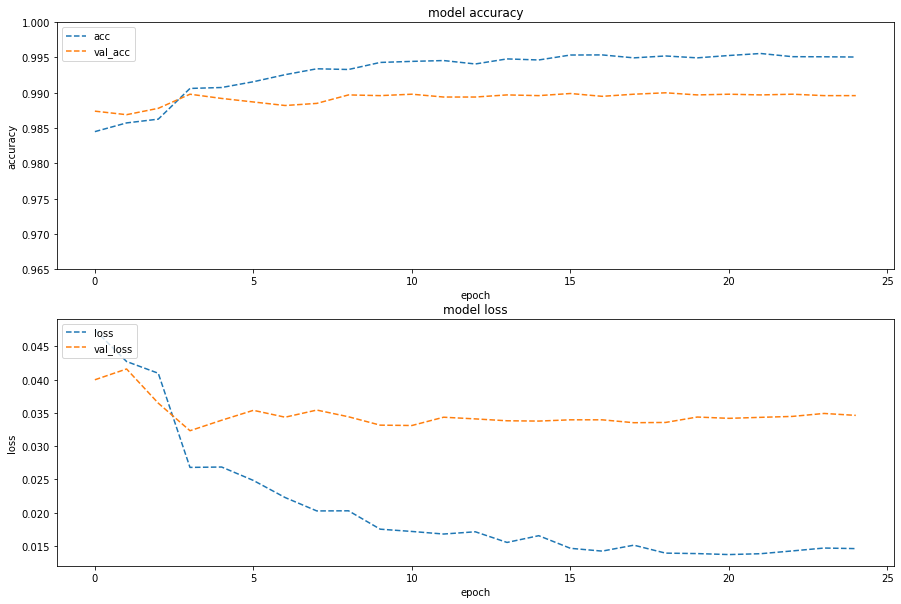

In [76]:
plt.figure(figsize=(15,10))

plt.subplot(211)
plt.plot(history.history['accuracy'], '--', label='acc')
plt.plot(history.history['val_accuracy'], '--',label='val_acc')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
axes=plt.gca()
axes.set_ylim([0.965, 1])

plt.subplot(212)
plt.plot(history.history['loss'], '--', label='loss')
plt.plot(history.history['val_loss'], '--',label='val_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper left')
axes=plt.gca()

plt.show()




In [77]:
# Saving the model
model.save("trained_model.hdf5")

It is clear that the loss and accuracy stabilize after training for around 15 epochs. We can use early stopping to avoid overtraining the model.

We achieved an error rate of 0.62% which on repeated iterations averages to 0.30% (Because of random variables) which is certainly better than the paper at 0.35%. The accuracy is 99.6% on the training set and 99% on the test set which is pretty good but certainly not the best, we can definitely improve the model by adding more layers, introducing batch normalization, tuning the hyper parameters, adding more data, etc. 

Let's try training the model again by increasing the dataset using data augmentation tools provided in keras. The model presented in the paper showed improvement in the test set result by increasing the data, let us see if we can replicate the same.

In [78]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
      rescale=1./255,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range = 20
      )

test_datagen = ImageDataGenerator(rescale=1./255)


history = model.fit(train_datagen.flow(trainX, trainY_onehot, batch_size = 32), epochs=25, 
                    validation_data=test_datagen.flow(testX, testY_onehot), callbacks = [callback2], verbose=1)

Epoch 1/25
1875/1875 [==============================] - 32s 17ms/step - loss: 0.4086 - accuracy: 0.8724 - val_loss: 0.0853 - val_accuracy: 0.9711 - lr: 0.0010
Epoch 2/25
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2352 - accuracy: 0.9259 - val_loss: 0.0724 - val_accuracy: 0.9751 - lr: 0.0010
Epoch 3/25
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2039 - accuracy: 0.9352 - val_loss: 0.0636 - val_accuracy: 0.9773 - lr: 0.0010
Epoch 4/25
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1841 - accuracy: 0.9421 - val_loss: 0.0637 - val_accuracy: 0.9792 - lr: 0.0010
Epoch 5/25
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1709 - accuracy: 0.9469 - val_loss: 0.0593 - val_accuracy: 0.9800 - lr: 0.0010
Epoch 6/25
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1593 - accuracy: 0.9490 - val_loss: 0.0510 - val_accuracy: 0.9823 - lr: 0.0010
Epoch 7/25
1875/1875 [========================

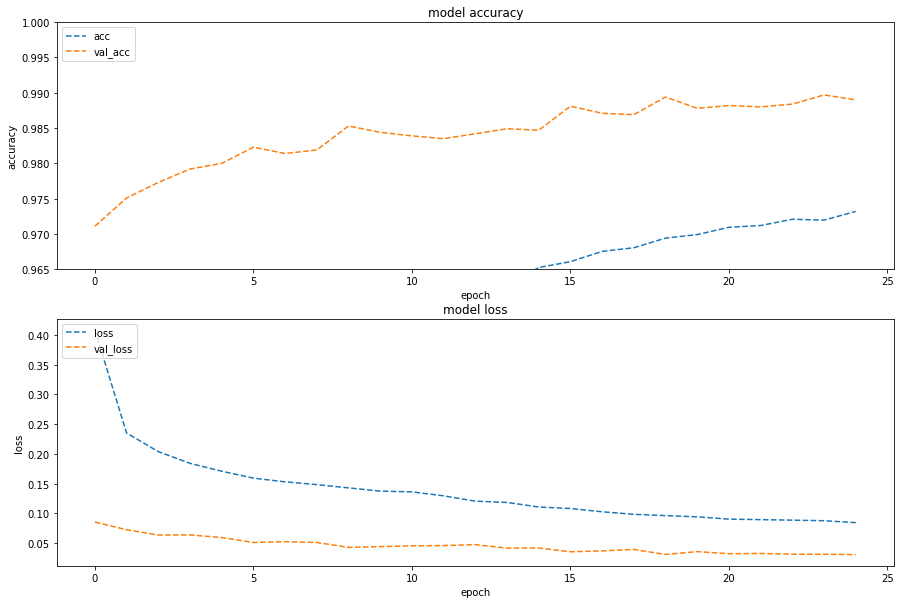

In [79]:
plt.figure(figsize=(15,10))

plt.subplot(211)
plt.plot(history.history['accuracy'], '--', label='acc')
plt.plot(history.history['val_accuracy'], '--',label='val_acc')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
axes=plt.gca()
axes.set_ylim([0.965, 1])

plt.subplot(212)
plt.plot(history.history['loss'], '--', label='loss')
plt.plot(history.history['val_loss'], '--',label='val_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper left')
axes=plt.gca()

plt.show()

As you can see, If we use data augmentation, training accuracy suffers but the validation accuracy increases, hence the model generalizes better. Data Augmentation is a useful way to prevent overfitting of a model.

In [80]:
# saving augmented model
model.save("data_augmented_model.hdf5")